<a href="https://colab.research.google.com/github/pranjal2234/Hotel-Bookings/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the csv file from google drive
bookings = pd.read_csv("/content/drive/MyDrive/Data/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Size of the dataset
bookings.shape

(119390, 32)

**Handling the missing values**

In [ ]:
#Checking for null values
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Deleting the company column as it has most of the values as null
bookings= bookings.drop(columns= "company")
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Replacing null values with appropriate values drop the required one
bookings.country.fillna("others",inplace = True)
bookings.agent.fillna(0,inplace = True)
bookings.dropna(inplace=True)

In [ ]:
#Sum of the null values by column
bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Checking for duplicate values**

In [ ]:
bookings[bookings.duplicated()].shape

(32001, 31)

In [ ]:
bookings.drop_duplicates(inplace = True)

In [ ]:
#Shape of the new dataset
bookings.shape

(87385, 31)

In [ ]:
bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].shape

(166, 31)

In [ ]:
bookings.drop(bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].index, inplace = True)

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
bookings[['children', 'agent']] = bookings[['children',  'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
bookings['reservation_status_date'] = pd.to_datetime(bookings['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
# Adding total persons staying days in hotels
bookings['total_stay'] = bookings['stays_in_weekend_nights']+bookings['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
bookings['total_person'] = bookings['adults']+bookings['children']+bookings['babies']

**Plotting the graph**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

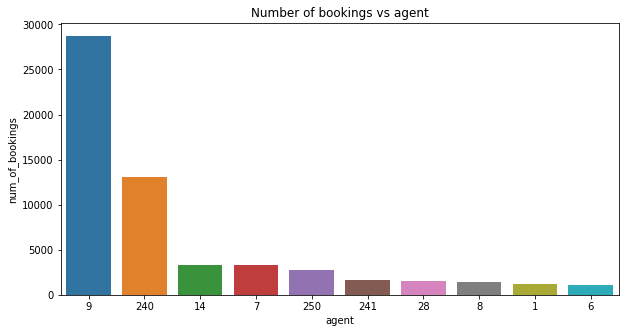

In [ ]:
data = pd.DataFrame(bookings['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data.drop(data[data['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
data = data[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
plt.title("Number of bookings vs agent")
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data, order = data.sort_values('num_of_bookings', ascending = False).agent)

Most of the bookings are done through agent number 9 followed by 240

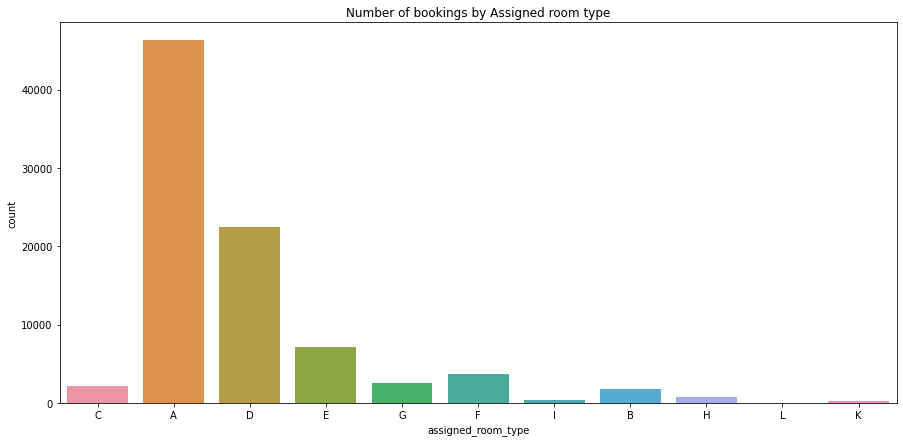

In [ ]:
grp_by_room = bookings.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()

countplt, ax = plt.subplots(figsize = (15,7))
plt.title("Number of bookings by Assigned room type")
ax = sns.countplot(data = data['Num_of_bookings'], x = bookings['assigned_room_type'])

**Conclusion :**Most booked room type is A

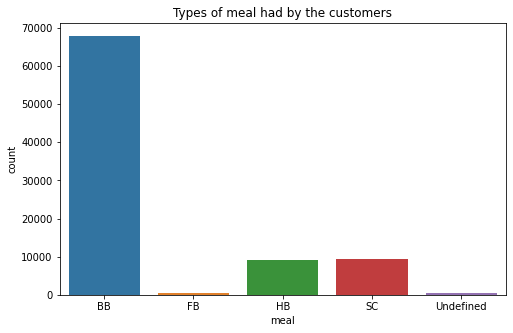

In [ ]:
plt.figure( figsize=(8, 5))

sns.countplot(x = bookings['meal'])
plt.title("Types of meal had by the customers")
plt.show()

**Conclusion :** BB type of meal is mostly preferred by the people.

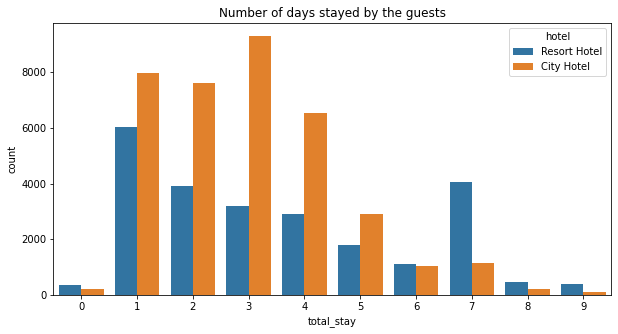

In [ ]:
stayed = bookings[bookings['is_canceled'] == 0]
stayed_less_than_10 = stayed[stayed['total_stay'] < 10]
plt.figure(figsize = (10,5))
plt.title("Number of days stayed by the guests")
sns.countplot(x = stayed_less_than_10['total_stay'], hue = stayed_less_than_10['hotel'])
plt.show()

**Conclusion :**Most of the people have stayed for 4 days. And city hotels are preferred much than Resort hotel

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = bookings[bookings['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = bookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16031,53268,30.09
Resort Hotel,7974,33951,23.49


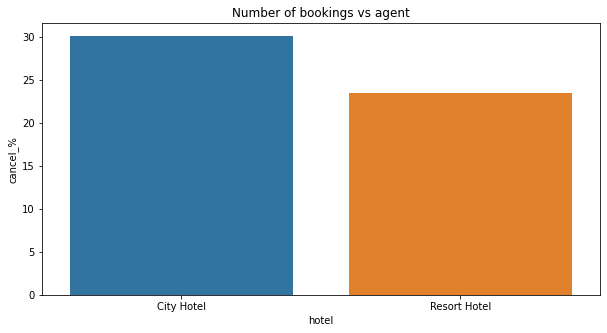

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.title("Number of bookings vs agent")
plt.show()

**Conclusion :**Almost 30 % of City Hotel bookings got canceled.

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = bookings[bookings['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)
D3

,total_repeated_guests,total_bookings,repeat_%
hotel,,,
City Hotel,1657,53268,3.11
Resort Hotel,1707,33951,5.03


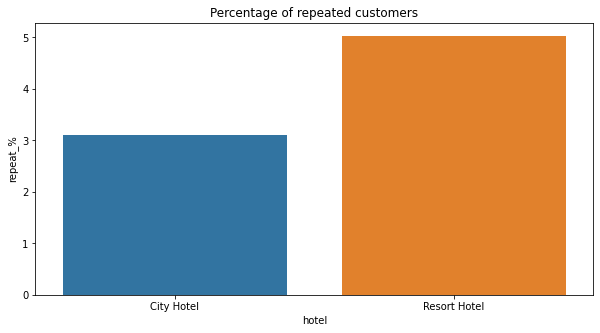

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.title("Percentage of repeated customers")
plt.show()

**Conclusion :** Around 5% of the customers are repeated customers in Resort Hotels and 3% in City Hotels.

Text(0.5, 1.0, 'Booking % by distribution channels')

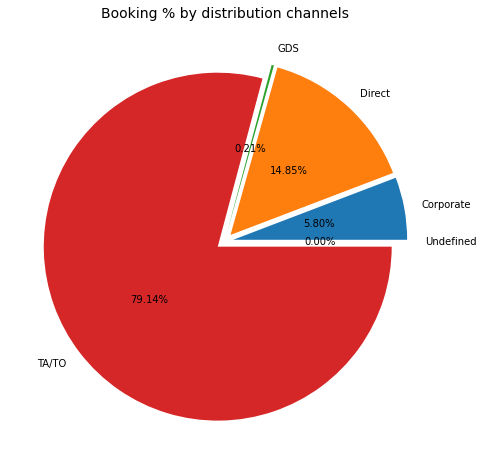

In [ ]:
group_by_dc = bookings.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/bookings.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14)

**Conclusion :**Around 80% of the bookings are done through TA/TO(travel agencies and travel organisations)

In [ ]:
import numpy as np

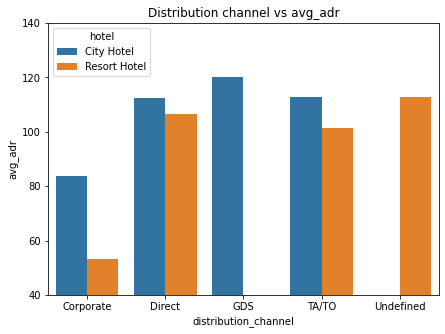

In [ ]:
group_by_dc_hotel = bookings.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.title("Distribution channel vs avg_adr")
plt.ylim(40,140)
plt.show()

**Conclusion :**GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

**Booking cancellation Analysis**

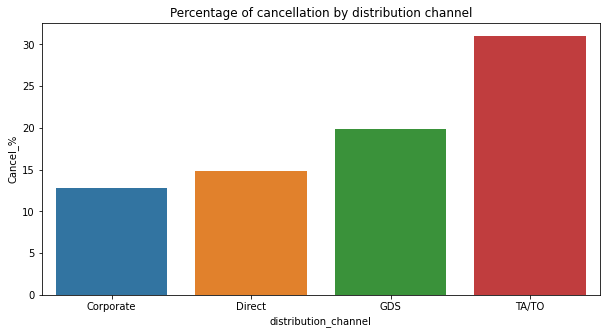

In [ ]:
df = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = df.index, y = df['Cancel_%'])
plt.title("Percentage of cancellation by distribution channel")
plt.show()

**Conclusion :**TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

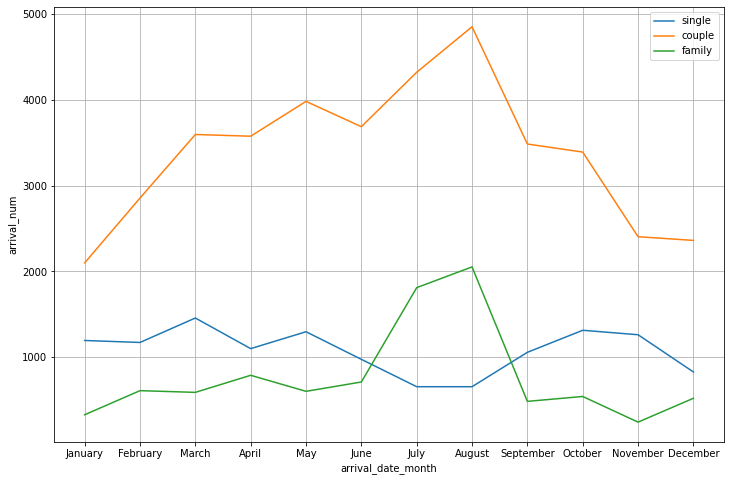

In [ ]:
## Select single, couple, multiple adults and family
single   =  stayed[(stayed['adults']==1) & (stayed['children']==0) & (stayed['babies']==0)]
couple   = stayed[(stayed['adults']==2) & (stayed['children']==0) & (stayed['babies']==0)]
family   = stayed[stayed['adults'] + stayed['children'] + stayed['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

**Conclusion :**Moslty bookings are done by couples.

Their is a sudden surge in arrival number of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

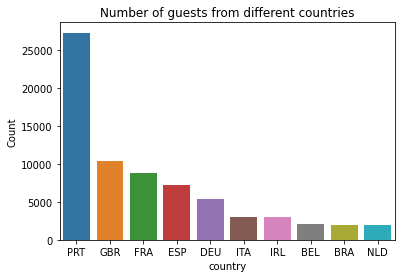

In [ ]:
grouped_by_country = bookings.groupby('country')
data = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = data['country'], y  = data['Count'])
plt.title("Number of guests from different countries")
plt.show()

**Conclusion :** Most of the guests are from PRT(Portugal)